# Ch. 8

In [1]:
# minimal imports
import pandas as pd
import numpy as np
from plotnine import *
import plotnine as p9

# for graphical enhancement
from mizani.formatters import date_format, percent_format, dollar_format, comma_format

# In most cases, you may not import them.
# you may need them If only you are adhere to color determination...
from matplotlib.pylab import cm
from matplotlib.colors import rgb2hex
from pysocviz.properties import colors

# dataset packages
from pysocviz.reader import load_dataset
from gapminder import gapminder

asasec = load_dataset('asasec')
organdata = load_dataset('organdata')
county_data = load_dataset('county_data')
gss_lon = load_dataset('gss_lon')
fredts = load_dataset('fredts')
yahoo = load_dataset('yahoo')
studebt = load_dataset('studebt')

p9.options.figure_size = (5.4, 4.8)
theme_set(theme_minimal(base_family='Noto Sans CJK JP'))

## Fig. 8.1

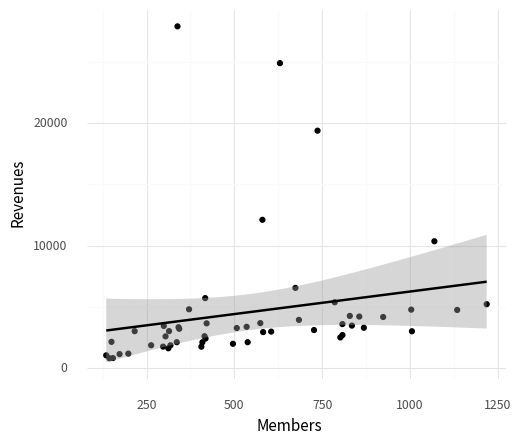

<ggplot: (8748709462556)>

In [2]:
p = ggplot(
  asasec.loc[lambda d: d['Year'] == 2014],
  aes(x='Members', y='Revenues', label='Sname')
)
p + geom_point() + geom_smooth(method='lm')

## Fig. 8.2

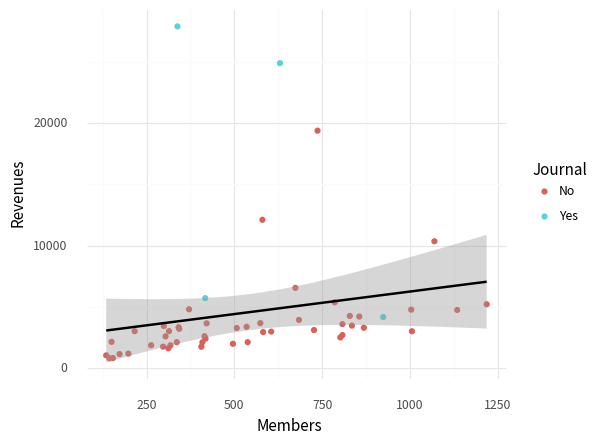

<ggplot: (8748671779506)>

In [3]:
p = ggplot(
  asasec.loc[lambda d: d['Year'] == 2014],
  aes(x='Members', y='Revenues', label='Sname')
)
p + geom_point(aes(color='Journal')) + geom_smooth(method="lm")

## Fig. 8.3

NOTE: When we change the legend position, it is often overlapped with the axis texts or titles. In this case, you need to manually adjust the position by `legend_position`, `legend_direction`, `subplot_adjust` themeables. Please remind that you can specify `legend_position` with a numeric tuple like the following.

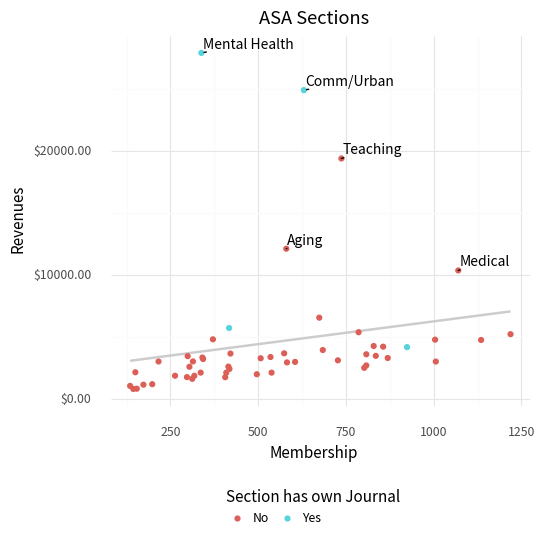

<ggplot: (8748627166609)>

In [27]:
p0 = ggplot(
  asasec.loc[lambda d: d['Year'] == 2014],
  aes(x='Members', y='Revenues', label='Sname')
)

p1 = p0 + geom_smooth(
  method="lm",
  se=False, color=colors["gray80"]
) + geom_point(aes(color='Journal')) 
p2 = p1 + geom_text(
  data=asasec.loc[lambda d: (d['Year'] == 2014) & (d['Revenues'] > 7000)],
  size=10, adjust_text={'arrowprops': {'arrowstyle': '-'}}
)
p3 = p2 + labs(
  x="Membership",
  y="Revenues",
  color="Section has own Journal",
  title="ASA Sections",
  subtitle="2014 Calendar year.",
  caption="Source: ASA annual report.")

p4 = p3 + scale_y_continuous(
  labels=dollar_format()
) + theme(
    legend_position=(.5, -.1),
    legend_direction='horizontal'
)
p4

## Figure 8.7

NOTE: You need to use `scale_color_cmap_d` instead of `scale_color_brewer`

/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 34 rows containing missing values.
/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 34 rows containing missing values.
/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 34 rows containing missing values.


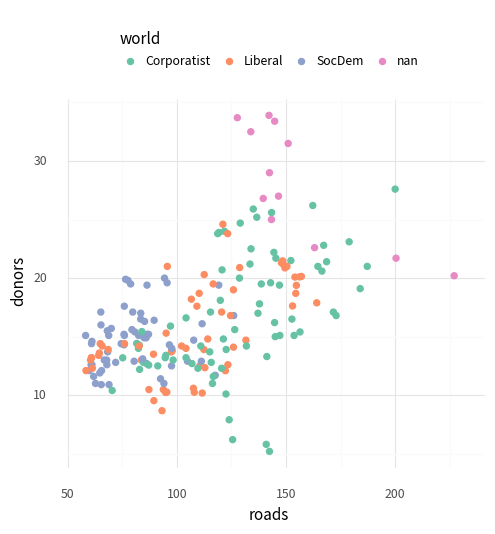

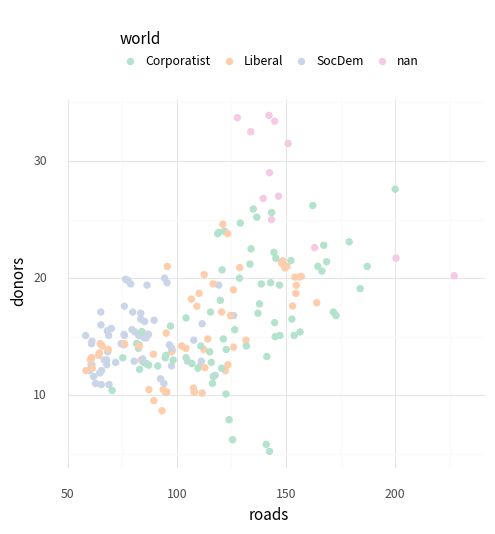

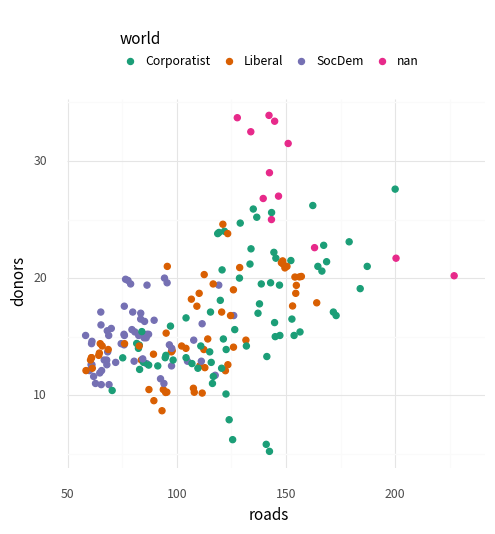

In [5]:
p = ggplot(organdata, aes(x='roads', y='donors', color='world'))
(
  p + geom_point(size=2) + scale_color_cmap_d("Set2"
  ) + theme(legend_position="top")
).draw();
(
  p + geom_point(size=2) + scale_color_cmap_d("Pastel2"
  ) + theme(legend_position="top")
).draw();
(
  p + geom_point(size=2) + scale_color_cmap_d("Dark2"
  ) + theme(legend_position="top")
).draw();

## Fig. 8.8

NOTE 1: I deem that this example is not a good usecase of `scale_color_manual`. Please see Fig. 5.26 in detail. 

NOTE 2: I again adjusted the legend position.

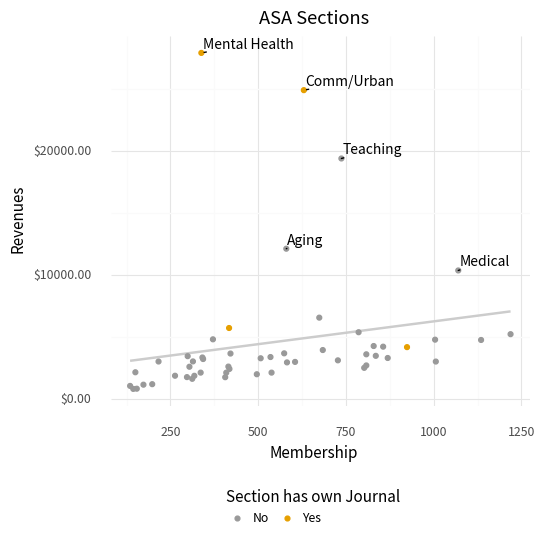

<ggplot: (8748629328035)>

In [30]:
cb_palette = ["#999999", "#E69F00", "#56B4E9", "#009E73",
              "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
p4 + scale_color_manual(values=cb_palette) + theme(
    legend_position=(.5, -.1)
)

## Fig. 8.10

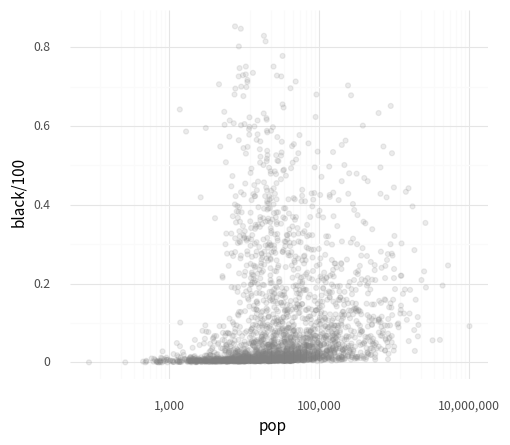

<ggplot: (8748671790897)>

In [7]:
p0 = ggplot(
  county_data.loc[lambda d: d['flipped']=='No'],
  aes(x='pop', y='black/100')
)

p1 = p0 + geom_point(
  alpha=0.15, color=colors["gray50"]
) + scale_x_log10(labels=comma_format())
p1

## Fig. 8.11

NOTE: Again and again, I point out that such usecase of `scale_color_manual` is not good...

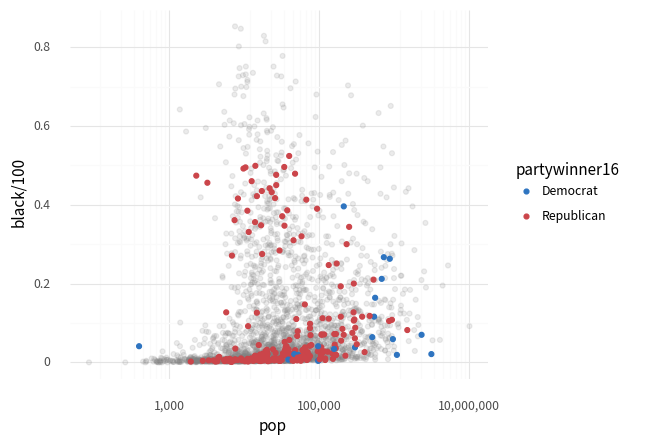

<ggplot: (8748627673619)>

In [8]:
party_colors = ["#2E74C0", "#CB454A"]
party_colors = {k: v for k, v in zip(['Democrat', 'Republican'], party_colors)}
p2 = p1 + geom_point(
  county_data.loc[lambda d: d['flipped']=='Yes'],
  aes(x='pop', y='black/100', color='partywinner16')
) + scale_color_manual(values=party_colors)
p2

## Fig. 8.12

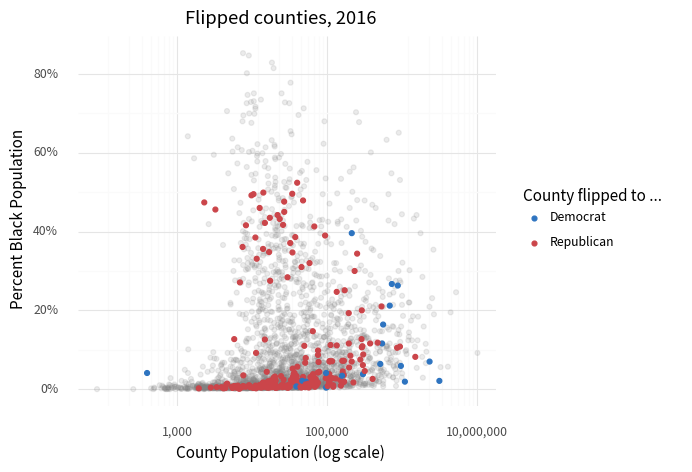

<ggplot: (8748669191542)>

In [9]:
p3 = p2 + scale_y_continuous(labels=percent_format()) + labs(
  color="County flipped to ... ",
  x="County Population (log scale)",
  y="Percent Black Population",
  title="Flipped counties, 2016",
  caption="Counties in gray did not flip."
)
p3

## Fig. 8.13

NOTE: Currently (v0.8), maybe plotnine cannot place the legend at the top of the plot, under the title text.

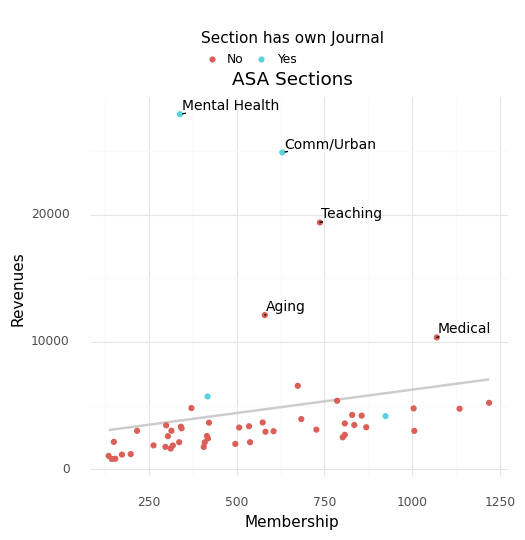

<ggplot: (8748666618236)>

In [34]:
p4 = p3 + geom_text(
  county_data.loc[lambda d: (d['flipped']=='Yes') & d['black'] > 25 ],
  aes(x='pop', y='black/100', label='state'),
  size = 10, adjust_text={'arrowprops': {'arrowstyle': '-'}}
)
p4 + theme_minimal() + theme(
    legend_position="top",
    subplots_adjust={'top': 0.9}
)

## Fig. 8.14


NOTE: Unfortunately, There are no extra theme presets for plotnine.

omit rel()

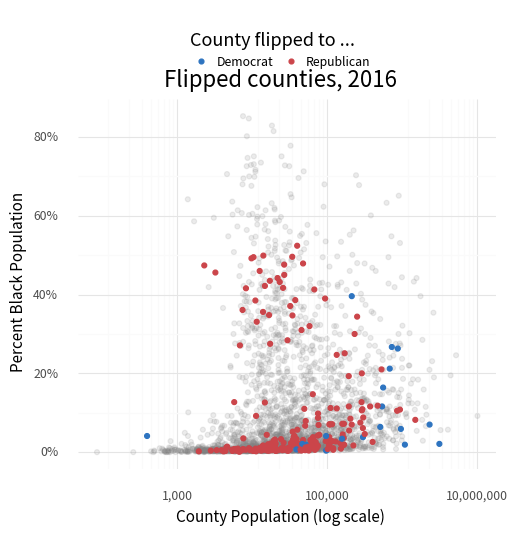

<ggplot: (8748664228714)>

In [11]:
p4 + theme(legend_position="top")

p4 + theme(
  plot_title=element_text(size=16),
  legend_title=element_text(size=13),
  # plot_caption=element_text(size=0.35),  # not working in plotnine
  legend_position="top")

## Fig. 8.15

NOTE: In my machine neither "Courier" nor "Times" are installed.

findfont: Font family ['Courier'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times'] not found. Falling back to DejaVu Sans.


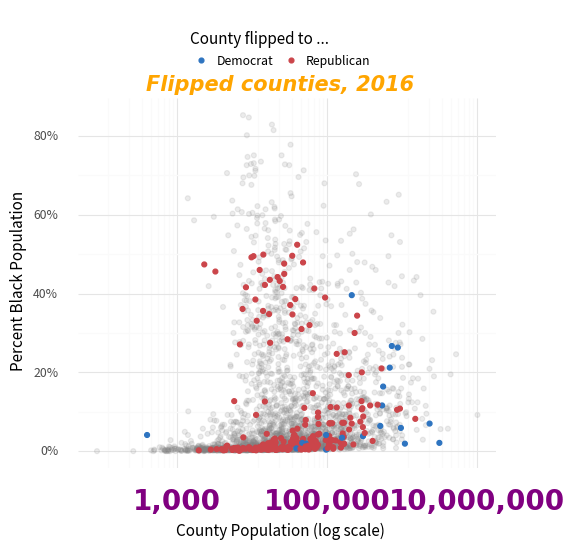

<ggplot: (8748627618058)>

In [12]:
p4 + theme(legend_position="top")
p4 + theme(
  legend_position="top",
  plot_title=element_text(
    size=15, lineheight=.5, family="Times",
    face="bold.italic", colour="orange"
  ),
  axis_text_x = element_text(
    size=20, family="Courier", face="bold", color="purple"
  )
)

## Fig. 8.16

/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:324: PlotnineWarning: stat_density : Removed 69 rows containing non-finite values.


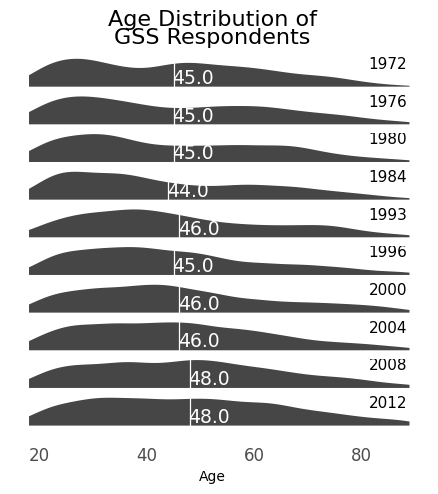

<ggplot: (8748664060922)>

In [13]:
yrs = np.concatenate(
  [np.arange(1972, 1988, 4), [1993], np.arange(1996, 2016, 4)],
  axis=None)
mean_age = gss_lon.loc[
  lambda d: (~d['age'].isna()) & (d['year'].isin(yrs))
].groupby(
  'year').agg({'age': 'mean'}
).rename(columns={'age': 'xbar'}).assign(
    xbar=lambda d: d['xbar'].round(0)
).assign(y=0.3).reset_index()

yr_labs = pd.DataFrame({'x': 85, 'y': 0.8, 'year': yrs})
p = ggplot(
  gss_lon.loc[lambda d: d['year'].isin(yrs)],
  aes(x='age')
)
p1 = p + geom_density(
  aes(y='..scaled..'),
  fill=colors["gray20"],
  color=None,
  alpha=0.9,
) + geom_vline(
  mean_age.loc[lambda d: d['year'].isin(yrs)],
  aes(xintercept='xbar'),
  color="white", size=0.5
) + geom_text(
  mean_age.loc[lambda d: d['year'].isin(yrs)],
  aes(x='xbar', y='y', label='xbar'),
  nudge_x=7.5,
  color="white", size=13.5, ha='right'
) + geom_text(
  yr_labs.loc[lambda d: d['year'].isin(yrs)],
  aes(x='x', y='y', label='year')
) + facet_grid(['year', '.'])

p1 + theme_minimal(base_size=10) + theme(
  plot_title = element_text(size = 16),
  axis_text_x= element_text(size = 12),
  axis_title_y=element_blank(),
  axis_text_y=element_blank(),
  axis_ticks_major_y=element_blank(),
  axis_ticks_minor_y=element_blank(),
  strip_background=element_blank(),
  strip_text_y=element_blank(),
  panel_grid_major=element_blank(),
  panel_grid_minor=element_blank()
) + labs(x="Age", y=None, title="Age Distribution of\nGSS Respondents")

## Fig. 8.17

NOTE: Currently (v0.8) `geom_density_ridges()` is not available and you cannot overlap density plots. Insteadly you need to use `geom_density()` with apperance customization. 


In [14]:
p = ggplot(
  gss_lon,
  aes(x='age', y='..scaled..')
)
p + geom_density(alpha=0.6, fill='lightblue', color='black'
) + scale_x_continuous(breaks=[25, 50, 75]
) + scale_y_discrete(expand = [0.01, 0]) +  labs(
  x="Age", y=None, title = "Age Distribution of\nGSS Respondents"
) + theme(title=element_text(size=16, face="bold")) + facet_wrap('~year')

/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:324: PlotnineWarning: stat_density : Removed 221 rows containing non-finite values.


TypeError: object of type 'NoneType' has no len()

## Fig. 8.20

NOTE: This figure needs the code which is one of the most far off from the original to create because of absense of cowplot package in Python.
The following two plots (`p1`, `p2`) are the imitation of original code.
But you cannot unite them into single image and it's hard to share the common axis.

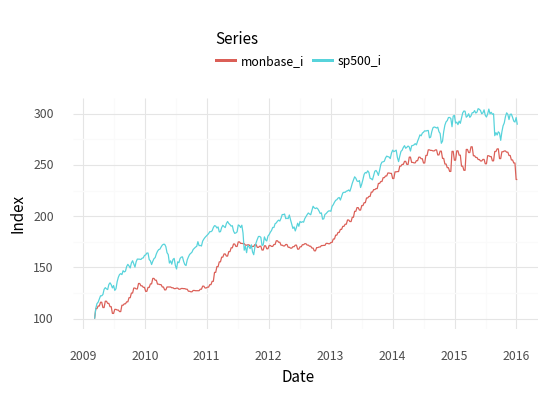

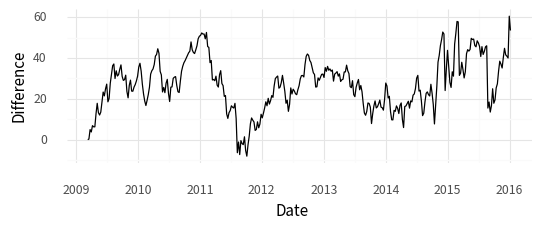

In [35]:
fredts_m = fredts[['date', 'sp500_i', 'monbase_i']].melt(
  id_vars='date', var_name='series', value_name='score'
)

p = ggplot(fredts_m, aes(x='date', y='score', group='series', color='series'))
p1 = p + geom_line() + theme(legend_position="top") + labs(
  x="Date", y="Index", color="Series")
p = ggplot(fredts, aes(x='date', y='sp500_i - monbase_i'))
p2 = p + geom_line() + labs(x="Date", y="Difference")
(p1 + theme(figure_size = (6, 3)) + scale_x_date(date_labels='%Y')).draw();
(p2 + theme(figure_size = (6, 2)) + scale_x_date(date_labels='%Y')).draw();

One of the solution is to create another column to identify the plot area and then use `facet_grid`, but you cannot change the aspect ratio of the indivisual facets. 

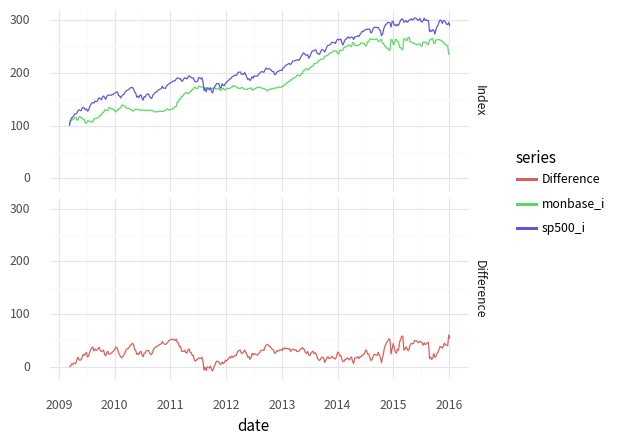

<ggplot: (8748627387917)>

In [19]:
fredts_py = pd.concat(
  [
    fredts_m.assign(var='Index'),
    fredts.assign(
      series='Difference',
      score=lambda d: d['sp500_i'] - d['monbase_i'],
      var='Difference'
    )[['date', 'series', 'score', 'var']]
  ],
  axis=0
).assign(var=lambda d: pd.Categorical(d['var'], ['Index', 'Difference']))
ggplot(
  fredts_py,
  aes(x='date', y='score', group='series', color='series')
) + geom_line(
) + facet_grid(
  'var ~ .', scales='fixed'  # or try scales='free_y'
) + theme(axis_title_y=element_blank()
) + scale_x_date(date_labels='%Y')

## Fig. 8.22

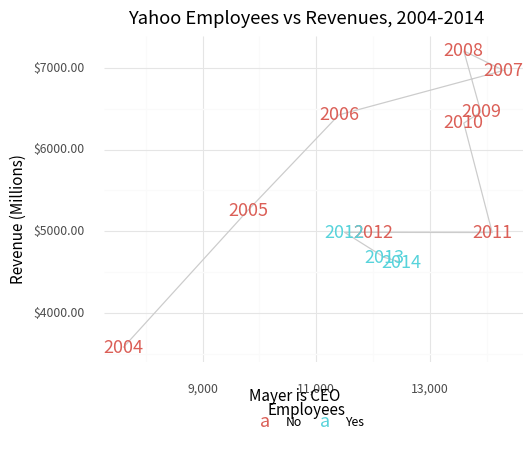

<ggplot: (8748627245261)>

In [20]:
p = ggplot(yahoo, aes(x='Employees', y='Revenue'))
p + geom_path(
  color=colors["gray80"]
) + geom_text(
  aes(color='Mayer', label='Year.astype(int)'),
  size=13
  # fontface="bold"  # currently not available
) + theme(
  legend_position=(.5, .1),
  legend_direction='horizontal',
  subplots_adjust={'bottom': 0.2}
) + labs(
  color="Mayer is CEO",
  x="Employees",
  y="Revenue (Millions)",
  title="Yahoo Employees vs Revenues, 2004-2014"
) + scale_y_continuous(labels=dollar_format()
) + scale_x_continuous(labels=comma_format()
)

## Fig. 8.23

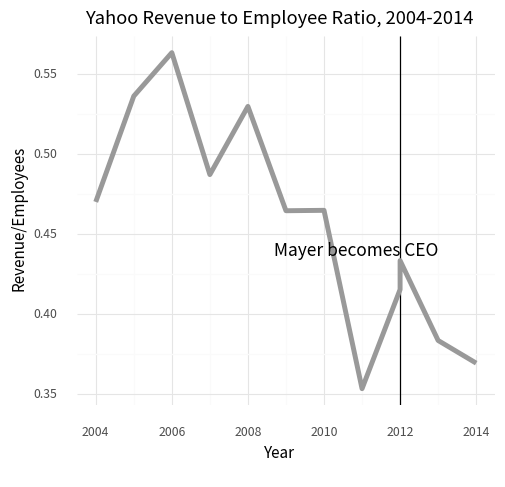

<ggplot: (8748664018011)>

In [36]:
p = ggplot(yahoo, aes(x='Year', y='Revenue/Employees'))
p + geom_vline(xintercept=2012) + geom_line(
  color=colors["gray60"], size=2
) + annotate(
  "text", x=2013, y=0.44, label=" Mayer becomes CEO", size=12.5, ha="right"
) + labs(
  x="Year\n",
  y="Revenue/Employees",
  title="Yahoo Revenue to Employee Ratio, 2004-2014"
)

## Fig. 8.25

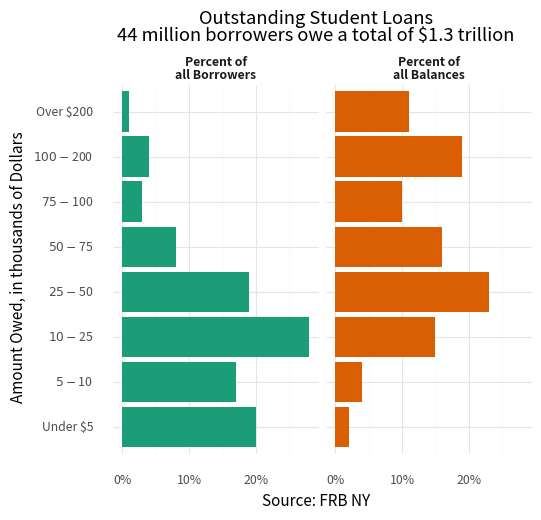

<ggplot: (8748669228740)>

In [37]:
p_xlab = "Amount Owed, in thousands of Dollars"
p_title = "Outstanding Student Loans"
p_subtitle = "44 million borrowers owe a total of $1.3 trillion"
p_caption = "Source: FRB NY"
f_labs = dict(
  Borrowers="Percent of\nall Borrowers",
  Balances="Percent of\nall Balances"
)

p = ggplot(studebt, aes(x='Debt', y='pct/100', fill='type'))
p + geom_bar(stat="identity") + scale_fill_brewer(
  type="qual", palette="Dark2"
) + scale_y_continuous(labels=percent_format()
) + guides(fill=False) + theme(
  strip_text_x = element_text(face="bold")
) + labs(
  y=p_caption, x=p_xlab,
  caption=p_caption,
  title='\n'.join([p_title, p_subtitle]),
  subtitle=p_subtitle) + facet_grid(
    '~ type', labeller=as_labeller(f_labs)
) + coord_flip()